In [50]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
import PIL 
import tensorflowjs as tfjs

img_height = 256
img_width = 256

Found 2149 files belonging to 3 classes.
Using 1935 files for training.
Found 2149 files belonging to 3 classes.
Using 214 files for validation.
(28, 256, 256, 1)
(28,)


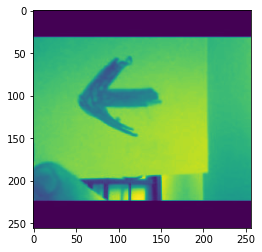

tf.Tensor(0, shape=(), dtype=int32)


In [51]:
ds_train= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="training",
    batch_size=28

    # image_size=(img_height,img_width)

)

ds_val= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="validation",
    # image_size=(img_height,img_width)
    batch_size=28
    
    
)



for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    i=0
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    # plt.colorbar()
    # plt.grid(False)
    plt.show()
    print(labels_batch[i])
    break





In [52]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    # image = tf.image.ra(x,max_delta=0.05)
    return image,y

ds_train = ds_train.map(augment)




(28, 256, 256, 1)
(28,)


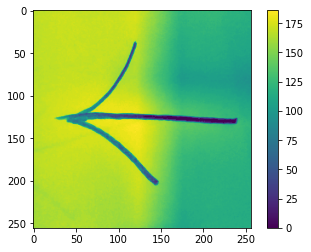

tf.Tensor(0, shape=(), dtype=int32)


In [53]:
for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    i=20
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(labels_batch[i])
    break

In [67]:
model = keras.Sequential([
  keras.layers.Resizing(256,256),
  keras.layers.Reshape((256,256,1)),
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(5, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(10, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(15, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

model.fit(ds_train,epochs=10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\aadit\AppData\Local\Temp\ipykernel_9116\4186518710.py", line 12, in <cell line: 1>
    keras.layers.Dense(128, activation='relu',color_mode='grayscale'),
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\dtensor\utils.py", line 96, in _wrap_function
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\dense.py", line 117, in __init__
    if self.units < 0:
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\trackable\base.py", line 205, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 335, in

In [58]:
model.evaluate(ds_val)

8/8 [==============================] - 1s 38ms/step - loss: 0.1150 - accuracy: 0.9720


[0.11502198129892349, 0.9719626307487488]

(231, 343, 1)


ValueError: in user code:

    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        callbacks.on_predict_begin()
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        if not isinstance(callbacks, callbacks_module.CallbackList):
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        verbose = _get_verbosity(verbose, self.distribute_strategy)
    File "c:\Users\aadit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • training=False
      • mask=None


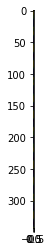

In [62]:
img = tf.keras.preprocessing.image.load_img('RIGHT.png')

image_array = tf.keras.preprocessing.image.img_to_array(img)

image_array = tf.image.rgb_to_grayscale(image_array)


image_array = tf.reshape(image_array,(img.height,img.width,1))

plt.imshow(image_array[0])

print(image_array.shape)

model.predict(image_array)


In [57]:
tf.keras.Model.save(model, filepath="model-1101")
tfjs.converters.save_keras_model(model, "model-1101js")

INFO:tensorflow:Assets written to: model-1101\assets


INFO:tensorflow:Assets written to: model-1101\assets
